In [1]:
import math
from typing import Any

import torch

from torch import Tensor
from torch.nn.parameter import Parameter, UninitializedParameter
from torch import functional as F

from torch.nn import Module
from scipy.stats import levy_stable
from torch.distributions.pareto import Pareto
from torch.nn import init
from torch.distributions.cauchy import Cauchy
from torch.distributions.laplace import Laplace
from numpy.random import standard_t
seed=0
#torch.cuda.manual_seed_all(seed)
with torch.cuda.device('cuda:0'):
    torch.cuda.empty_cache()
import gc

gc.collect()

12

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a=0.5
T=0.4
epsilon=1
m=T*epsilon
s=(levy_stable.rvs)
print(s)
print(s/2)
#np.append()
value=1000
s=(levy_stable.rvs(alpha=self.mu,beta=0, size=value)[:int(value/2)]
print(s.size)
print(s.min())
# shape and mode
#s = (np.random.pareto(a, 1000) + 1) * m
plt.hist(s,bins=1000,density=True)
#plt.xscale("log")
plt.yscale("log")
plt.show()

In [3]:
def stats(tensor):
    # Calculate the mean
    mean = torch.mean(tensor)
    # Calculate the variance
    second = torch.mean(torch.pow(tensor,2))
    third = torch.mean(torch.pow(tensor,3))
    fourth=torch.mean(torch.pow(tensor,4))
    # Calculate the standard deviation
    var=torch.var(tensor)
    std = torch.sqrt(var)
    # Calculate the z-scores
    zscores = (tensor - mean) / std
    # Calculate the skewness
    skew = torch.mean(zscores ** 3)
    # Calculate the kurtosis
    kurt = torch.mean(zscores ** 4) - 3
    #print("fourth moment")
    #print(fourth)
    #Return the results as a tuple
    return mean, second, skew, kurt

In [12]:
weight_tuning=1
## initial =1
class Linear(Module):
    r"""Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

    This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

    On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

    Args:
        in_features: size of each input sample
        out_features: size of each output sample
        bias: If set to ``False``, the layer will not learn an additive bias.
            Default: ``True``

    Shape:
        - Input: :math:`(*, H_{in})` where :math:`*` means any number of
          dimensions including none and :math:`H_{in} = \text{in\_features}`.
        - Output: :math:`(*, H_{out})` where all but the last dimension
          are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

    Attributes:
        weight: the learnable weights of the module of shape
            :math:`(\text{out\_features}, \text{in\_features})`. The values are
            initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, where
            :math:`k = \frac{1}{\text{in\_features}}`
        bias:   the learnable bias of the module of shape :math:`(\text{out\_features})`.
                If :attr:`bias` is ``True``, the values are initialized from
                :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})` where
                :math:`k = \frac{1}{\text{in\_features}}`

    Examples::

        >>> m = nn.Linear(20, 30)
        >>> input = torch.randn(128, 20)
        >>> output = m(input)
        >>> print(output.size())
        torch.Size([128, 30])
    """
    __constants__ = ['in_features', 'out_features']
    in_features: int
    out_features: int
    weight: Tensor

    def __init__(self, in_features: int, out_features: int,mu, bias: bool = True,
                 device=None, dtype=None,a=0.5) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super().__init__()
        self.mu=mu
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.empty((out_features, in_features), **factory_kwargs))
        if bias:
            self.bias = Parameter(torch.empty(out_features, **factory_kwargs))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self) -> None:
        #if reset=True:
            
        # Setting a=sqrt(5) in kaiming_uniform is the same as initializing with
        # uniform(-1/sqrt(in_features), 1/sqrt(in_features)). For details, see
        # https://github.com/pytorch/pytorch/issues/57109
        fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight)
        bound =weight_tuning/ math.sqrt(fan_in) if fan_in > 0 else 0
        #init.uniform_(self.weight, -bound,bound)
        #m=standard_t(self.mu,(self.in_features,self.out_features))
        value=self.out_features*self.in_features
        #print(int(value/2))
        m=np.append(levy_stable.rvs(alpha=self.mu,beta=0, size=value)[:int(value/2)],(-1*levy_stable.rvs(alpha=self.mu,beta=0, size=value)[:int(value/2)]))
        
        #m = levy_stable.rvs(alpha=0.5,beta=0,size=self.out_features*self.in_features)
        
        
        a=torch.Tensor(m).resize(self.out_features,self.in_features)
        #a=m.sample(torch.Size([self.in_features*self.out_features]))[:,0]
        #a=a.resize(self.out_features,self.in_features)
        self.weight=torch.nn.Parameter(a)
        #init.kaiming_uniform_(self.weight, a=math.sqrt(5))
        if self.bias is not None:
            fan_in, _ = init._calculate_fan_in_and_fan_out(self.bias)
            bound =weight_tuning/ math.sqrt(fan_in) if fan_in > 0 else 0
            init.uniform_(self.bias, -bound, bound)
            #init.uniform_(self.weight, -bound,bound)

    def forward(self, input: Tensor) -> Tensor:
        return F.linear(input, self.weight, self.bias)

    def extra_repr(self) -> str:
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


In [13]:
import torch
import torchvision
#torch.cuda.is_available()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
#from torch.autograd.functional import jacobian
#import torch.autograd.functional
import time
import copy
import matplotlib.pyplot as plt
import pandas as pd
torch.set_default_dtype(torch.float64)
batch_size=100
input_size=784
output_size=784
hidden_state_size=10
N=28
no_of_layer=2



font = {
        'size'   : 26}
plt.rc('font', **font)

class AE(nn.Module):
    def __init__(self, input_shape,hidden_layer_shape,encoder_output_shape,n,mu,xinit=torch.eye(batch_size,input_size),xfinal=torch.eye(batch_size,input_size),hidden=torch.eye(10,input_size)):
        super().__init__()
        self.mu=mu
        self.encoder_output_layer = Linear(
            in_features=input_shape, out_features=encoder_output_shape
        ,mu=self.mu,bias=False)
        self.decoder_output_layer = Linear(
            in_features=encoder_output_shape, out_features=input_shape
        ,mu=self.mu,bias=False)

        #self.encoder_input_layer.weight=torch.nn.Parameter(torch.rand(self.encoder_input_layer.weight.size))
        
        self.number_of_layers=n
        self.xinit=xinit
        self.xfinal=xfinal
        self.hidden=hidden

    def forward(self, features):
        reconstructed=self.internals(features)
        return reconstructed
    
    def internals(self,features):
        code=self.encoder(features)
        self.hidden=code
        #print("hidden state:"+str(code))
        reconstructed=self.decoder(code)
        return reconstructed
    
    def encoder(self,features):


        code = self.encoder_output_layer(features)
        result = torch.tanh(code)
        return code
    
    def decoder(self,code):  
        activation = self.decoder_output_layer(code)
        reconstructed = torch.tanh(activation)
        return reconstructed
    
    def xfinals(self):
        return self.xfinal
    
    def xinits(self):
        return self.xinit
    
    def hiddens(self):
        return self.hidden

In [14]:

#transform=
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([
    transforms.ToTensor()
]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([
    transforms.ToTensor()
]))  
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=batch_size,shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=batch_size,shuffle=False)

In [15]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
mu=1
#model = AE(input_size,output_size,hidden_state_size,no_of_layer,mu).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3

#optimizer =torch.optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
#criterion = nn.MSELoss()

#print(model.encoder_input_layer.weight)

cuda


In [16]:
import matplotlib.pyplot as plt 
epochs=1000
asymptotic_repetition=150


#projected_jacobian=[]
ave_len=5


no_of_images,no_of_repetition=20,50
spectral_calculation=5
colour=np.arange(1,no_of_repetition+1)
perturbation_strength=10**(-6)
noise_strength=10**(-3)
interval=50

In [17]:
def add_gaussian_noise(inputs,strength):
    #print(inputs.size())
    noise = torch.randn_like(inputs)*strength*torch.max(inputs)
    result=inputs + noise
    return result
def add_powerlaw_noise(input_size,batch_size,strength,images):
    ##input size here is the side of the image 28 
    m = Pareto(torch.tensor([1.0]), torch.tensor([1.0]))
    res=m.sample(images.size())

    temp=res/np.sqrt(res.var())/N/batch_size*strength
    noise=temp-temp.mean()
    #if print_bool:
     #   plt.title(powerlaw_noise print)
      #  plt.hist(noise.flatten(),density=True, bins='auto', histtype='stepfilled')
        
      #  plt.show()
    #print(noise[:,:,:,:,0].size())
    return noise[:,:,0]+images

def validation(test_loader):
    
    with torch.no_grad():

     #valid_loss = criterion(outputs, batch_features.view(batch_size,-1).to(device))
        loss=0
        for batch_features, _ in test_loader:
            #input=add_noise(batch_features,).view(100, -1).to(device)
            input_image=add_gaussian_noise(batch_features,noise_strength).view(batch_size, -1).to(device)
            #batch_feature = batch_features.view(batch_size, -1)
            #input_image =add_powerlaw_noise(input_size,batch_size,noise_strength,batch_feature).view(batch_size, -1).to(device)
            batch_feature = batch_features.view(batch_size, -1).to(device)
            outputs = model(input_image)
            valid_loss = criterion(outputs, input_image.to(device)) 
            #accuracy+=kl_div(outputs,batch_features)/batch_size
            loss += valid_loss.item()
    return loss/len(test_loader)
            
def kl_div(output_image,input_image):
    accuracy=0
    kl_loss = nn.KLDivLoss(reduction="batchmean")
    for i in range(len(input_image)):
        input_spectrum=torch.histogram(input_image[i].cpu(), bins=256, density=True)
        output_spectrum=torch.histogram(output_image[i].cpu(), bins=256, density=True)
        accuracy+=kl_loss(input_spectrum[i],output_spectrum[i])
    return accuracy/len(input_image)

def iteration(model,initial_inputs,no_of_repetition,epoch):
    y_pred=initial_inputs.to(device)
    for i in range(no_of_repetition):
        x_train=y_pred
        #if i==0:
           # name="progress asymptotic iteration:"+str(i)+" "
           # visualisation(x_train[0].cpu().detach(),epoch,name,False)
        #if i%5==1:
            #name="progress asymptotic iteration:"+str(i)+" "
            #visualisation(x_train[0].cpu().detach(),epoch,name,False)
        y_pred=model(x_train)
    return x_train,y_pred,model 
def asymptotic_jacobian(model,initial_input,no_of_images,no_of_repetition):
    ave_jac=1
    overall_distribution=np.asarray([])
    y_pred=initial_input.to(device)
    jacobian=[]
    sorteds=np.asarray([])
    for j in range(no_of_repetition):
        #print("here")
        x_train=y_pred
        
        y_pred=model(x_train)
        mean_jacobian=torch.eye(input_size,output_size).to(device)
        
        for i in range(no_of_images):
            x=x_train[i]
            res=torch.autograd.functional.jacobian(model,x)
            distribution=np.asarray([])
            jacobian.append(res)
            sorted=np.asarray([])
            #if j==no_of_repetition-1
            mean_jacobian*=res
             #   distribution,sorted=spectral_distribution(res.cpu())
              #  overall_distribution=np.concatenate((overall_distribution,distribution),axis=0)
              #  spectral=spectral_radius(sorted)
              #  sorteds=np.append(sorteds,spectral)

        norm=torch.norm(mean_jacobian).cpu()
        #mean_jacobian*=(1/np.sqrt(output_size)*norm)**(1/no_of_images)
        #mean_jacobian=mean_jacobian/no_of_images
        ave_jac*=(1/np.sqrt(output_size)*norm)**(1/no_of_repetition*1/no_of_images)
        print(ave_jac)
        print(norm)
        print(norm**(1/no_of_repetition*1/no_of_images))
    #average_jacobian=ave_jac/no_of_repetition
    print(jacobian)
    return ave_jac,overall_distribution,jacobian,sorteds

def spectral_radius(jacobian,no_of_repetition,no_of_images):
    #result=[]
   
    #output=initial_input.to(device)
   # product=torch.eye(n=input_size,m=output_size).to(device)
    
    spectral=0

    
        
    #res=torch.autograd.functional.jacobian(model.internals,initial_input)
    #product=torch.matmul(product,res)
    #output=model(initial_input)
   # initial_input=output
    
    s,v=torch.linalg.eig(jacobian)
 #   #print(s)
    abs=torch.abs(s)
    
    spectral=torch.max(abs).item()
    return spectral

def poincare_plot(model,initial_input,dimension_vector,no_of_repetition,colour,epoch):
    xt=[]
    xtminus=[]
    
    output=initial_input
    
    for i in range(no_of_repetition):
        
        initial_input=output
        output=model(initial_input)
        
        xt.append(1/output_size*torch.dot(output,dimension_vector).item())
        xtminus.append(1/output_size*torch.dot(initial_input,dimension_vector).item())
    
    return xt,xtminus
  
    


def asymptotic_distance(xinfinity_unperturbed,xinfinity_perturbed,perturbation):
    result=[]
    for i in range(len(xinfinity_unperturbed)):
    
        sum=0
        
        for j in range(len(xinfinity_unperturbed[i])):
            
            temp=np.linalg.norm(xinfinity_unperturbed[i][j]-xinfinity_perturbed[i][j])
            sum+=temp
        
        result.append(1/output_size*1/len(xinfinity_unperturbed[i])*sum) 
    
    return result


def calculation(model,no_of_images,no_of_repetition,ave_jacobian,spectral_radiuses,image,epoch,mu):
    spectral=0
    
    model_clone=AE(input_size,input_size,hidden_state_size,no_of_layer,mu).to(device)
    model_clone.load_state_dict(copy.deepcopy(model.state_dict()))
    distributions=np.asarray([])
    x_train,y_pred,model_clone=iteration(model_clone,image,asymptotic_repetition,epoch)   
    #ave_jac,distributions,jacobian,sorteds= asymptotic_jacobian(model_clone,x_train,no_of_images,no_of_repetition)
    ave_jac=[]
    #np.savetxt("jacobian epoch"+str(epoch)+".txt",sorteds)
    #print("distribution size")
    #print(distributions.size)
    #print("sorted size")
    #print(sorteds.size)
    #average_jacobian.append(ave_jac)
    #x = [ele.real for ele in distributions]
    ## extract imaginary part
    #y = [ele.imag for ele in distributions]
    #plt.title("real and imaginary part of eigenvalue")
    #plt.scatter(x, y)
    #plt.ylabel('Imaginary')
    #plt.xlabel('Real')
    #plt.xscale("log")
    #plt.yscale("log")
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
    #plt.savefig("epoch:"+str(epoch+1)+"number of iteration:"+str(no_of_repetition)+"eigenvalue scatter plot.jpg",bbox_inches = 'tight')
    #plt.show()
    #plt.title("modulus of eigenvalue in log log plot ")
    #plt.hist(sorteds, density=True, bins='auto', histtype='stepfilled')
    #plt.yscale("log")
    #plt.xscale("log")

    #plt.savefig("epoch:"+str(epoch+1)+"number of iteration:"+str(no_of_repetition)+"eigenvalue distribution.jpg",bbox_inches = 'tight')
    #plt.show()

   # for i in range(no_of_images):
    
        #spectral+=spectral_radius(sorteds,no_of_repetition,no_of_images)
    #spectral=sorteds.mean()
    
    #spectral_radiuses.append(spectral)
    #print(spectral/no_of_images)
    
    return x_train,y_pred,average_jacobian,spectral_radiuses,model_clone


def asymptotic_iteration(model_new,initial_inputs,perturbed_inputs,no_of_repetition,no_of_image,cutoff):
    
    y_pred_unperturbed=initial_inputs.to(device)
    y_pred_perturbed=perturbed_inputs.to(device)

    distance=[]
    hidden_layer=[]
    hiddens=[]
    chaos=0
    ave_jac=[]
    #ave_jac,distributions,jacobian,sorteds= asymptotic_jacobian(model_new,y_pred_unperturbed,no_of_images,no_of_repetition)
    for i in range(no_of_repetition):
        x_train_unperturbed=y_pred_unperturbed
        y_pred_unperturbed=model_new(x_train_unperturbed)
        
       
        x_train_perturbed=y_pred_perturbed
        y_pred_perturbed=model_new(x_train_perturbed)
        

        
        hidden = model.hiddens()

        hidden_layer.append(torch.sum(hidden,dim=1)[0].cpu().detach().numpy()/10)
        hiddens.append(torch.sum(hidden,dim=1).cpu().detach().numpy()/10)
        
        #visualisation(y_pred.view(batch_size,-1)[0].cpu().detach(),epoch)


        #diff=0
        diff=torch.ones(1,device=device)
        temp=0
        #print(len(cutoff))
        for j in range(no_of_image):
            result=torch.norm(y_pred_unperturbed[j]-y_pred_perturbed[j])

            if np.isinf(result.cpu().detach().numpy()) or np.isnan(result.cpu().detach().numpy())  :
                result=torch.Tensor([1*10**38]).to(device)
                print("infinity")
            if result.cpu().detach().numpy()<2**-52:
                result=torch.Tensor([2**-52]).to(device)
            diff*=result**(1/no_of_image)
            
            #print(j)
            if result>cutoff[j] and i==no_of_repetition-1:
                chaos+=1
        if np.isinf(diff.cpu().detach().numpy()) or np.isnan(diff.cpu().detach().numpy()):
            diff=torch.Tensor([1*10**38]).to(device)
            print("infinity")

            
        if diff.cpu().detach().numpy()<2**-52:
            diff=torch.Tensor([2**-52]).to(device)
        distance.append(diff.cpu().detach().numpy())

    return distance,hidden_layer,chaos/no_of_image,ave_jac

def visualisation(xfinals,epoch,name,bool):
    plt.imshow(xfinals.reshape(N,N), cmap="gray")
    if bool:
        plt.savefig(str(name)+" epoch:"+str(epoch+1)+".jpg")
    plt.show()
    print(str(name)+" epoch:"+str(epoch+1)+".jpg")
    
def divergence(values):
    result=np.abs(values[-1]-values[-2])
    if result>np.abs(values[2]-values[1]):
        return 1
    return 0

def spectral_radius(sorted):
    if len(sorted)==0:
        return 0
    return sorted[0]

def spectral_distribution(input_matrix):
    result=[]
    count=0
    s,v=torch.linalg.eig(input_matrix)
    #return s
    for i in range(len(s)):
        if np.abs(s[i].cpu())<2**-52:
            count+=1
        
    sorted, indices=torch.sort(torch.abs(s),dim=-1,descending=True)
    #for index in indices.cpu():
     #   if index<=len(s)-count:
     #       result.append(s[index])
    #print(sorted)
    return s,sorted[:-count]



In [ ]:

spectral_radiuses=[]
average_jacobian=[]
xinfinity=[]
xpinfinity=[]
training_loss=[]
validation_loss=[]
asymptotic_dist=[]
#diverge=[]
start=time.time()
print("running")
#strength=0.1
#epochs=10
mu=1
dmu=1/epochs

init_compute=True
chao=[]
noise_print=False
repeats=100
average_chaos=[]
first_moment=[]
second_moment=[]
third_moment=[]
fourth_moment=[]
for i in range(repeats):
    mu=1
    chao=[]
    asy_dist=[]
    print(i)
    for epoch in range(epochs+1):
        loss = 0
        #mu+=dmu
        #print(mu)
        if epoch==0:
            for batch_features, _ in train_loader:
            # reshape mini-batch data to [1000, 784] matrix
            # load it to the active device
                input_image =add_gaussian_noise(batch_features,noise_strength).view(batch_size, -1).to(device)
        
        model = AE(input_size,output_size,hidden_state_size,no_of_layer,mu).to(device)           
        save_image=input_image
        perturbed_inputs=add_gaussian_noise(input_image,perturbation_strength)
        inits=0
    
        for value in model.parameters():

            first,second,third,fourth=stats(value)
            first_moment.append(first.cpu().detach().numpy())
            second_moment.append(second.cpu().detach().numpy())
            third_moment.append(third.cpu().detach().numpy())
            fourth_moment.append(fourth.cpu().detach().numpy())
            inits+=1
        cutoff=[]
        for j in range(no_of_images):
            cutoff.append(torch.norm(perturbed_inputs[j]-input_image[j]))
        model_clone=AE(input_size,input_size,hidden_state_size,no_of_layer,mu).to(device)
        model_clone.load_state_dict(copy.deepcopy(model.state_dict()))

        #spectral_radiuses=[]
        x_train_perturbed,y_pred_perturbed,average_jacobian,spectral_radiuses,model_clone=calculation(model,no_of_images,no_of_repetition,average_jacobian,spectral_radiuses,perturbed_inputs,epoch,mu)
        x_train_unperturbed,y_pred_unperturbed,average_jacobian,spectral_radiuses,model_clone=calculation(model,no_of_images,no_of_repetition,average_jacobian,spectral_radiuses,input_image,epoch,mu)

        distance,hidden,chaos,ave_jac=asymptotic_iteration(model_clone,y_pred_unperturbed,y_pred_perturbed,no_of_repetition,no_of_images,cutoff)
          
        asy_dist.append(distance[-1])
        chao.append(chaos)
        #print(ave_jac)
        mu+=dmu
    print("here\n") 
    np.savetxt("average_chaos"+str(i)+".txt",chao)
    average_chaos.append(chao)
    #print(average_chaos)
    asymptotic_dist.append(asy_dist)
    np.savetxt("asymptotic distance"+str(i)+".txt",asy_dist)


end=time.time()
print(end-start)

#print(chao)



running
0


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:776: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


here

1
here

2
here

3
here

4
here

5
here

6
here

7
here

8
here

9
here

10
here

11
here

12
here

13
here

14
here

15
here

16
here

17
here

18
here

19
here

20
here

21
here

22
here

23
here

24
here

25


In [25]:
def processing(moment):
    moment=np.asarray(moment)
    moment=moment.reshape(repeats,epochs+1,2)
    #moment=np.mean(moment,axis=0)
    moment=np.abs(moment)
    moment=geometric_mean(moment)
    return moment
def moment_treatment(mu,moment,indicator):
    
    moment=np.asarray(moment)
    moment=moment.reshape(repeats,epochs+1,2)
    #moment=np.mean(moment,axis=0)
    moment=np.abs(moment)
    moment=geometric_mean(moment)
    #if indicator=="first"
        
    plt.plot(mu,moment.T[0])
    plt.ylabel(indicator+" moment")
    plt.xlabel("exponent")
   
    plt.title(indicator+" moment vs exponent graph for t distribution first layer")
    np.savetxt(indicator+" moment vs exponent graph for t distribution layer 1.txt",moment.T[0])
    plt.savefig(indicator+" moment vs exponent graph for t distribution layer 1.jpg")
    plt.yscale("log")
    plt.show()
    plt.plot(mu,moment.T[1])
    plt.ylabel(indicator+" moment")
    plt.xlabel("exponent")
    plt.yscale("log")
    plt.title(indicator+" moment vs exponent graph for t distribution second layer")
    np.savetxt(indicator+" moment vs exponent graph for t distribution layer 2.txt",moment.T[1])
    plt.savefig(indicator+" moment vs exponent graph for t distribution layer 2.jpg")
    plt.show()
    
def chaos_treatment(mu,chaos,indicator):
    chaos=np.asarray(chaos)
    if indicator=="asymptotic distance":
        chaos=geometric_mean(chaos)
        print(chaos.size)
    else:
        chaos=np.mean(chaos,axis=0)
    
    
    plt.plot(mu,chaos)
    plt.ylabel(indicator)
    plt.xlabel("exponent")
    if indicator=="asymptotic distance":
        print("here")
        plt.yscale("log")
    plt.title(indicator+" vs exponent graph for t distribution ")
    np.savetxt(indicator+" vs exponent graph for t distribution.txt",chaos)
    plt.savefig(indicator+" vs exponent graph for t distribution.jpg")
    plt.show()
 
def geometric_mean(mean):
    result=1
    for i in range(len(mean)):
        result*=mean[i]**(1/len(mean))
    return result

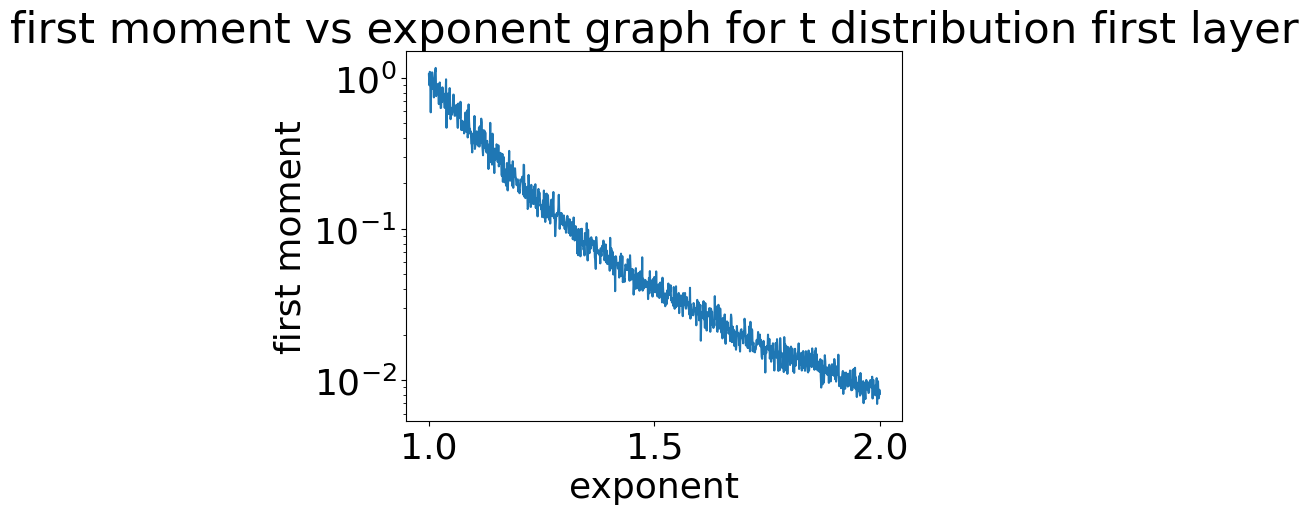

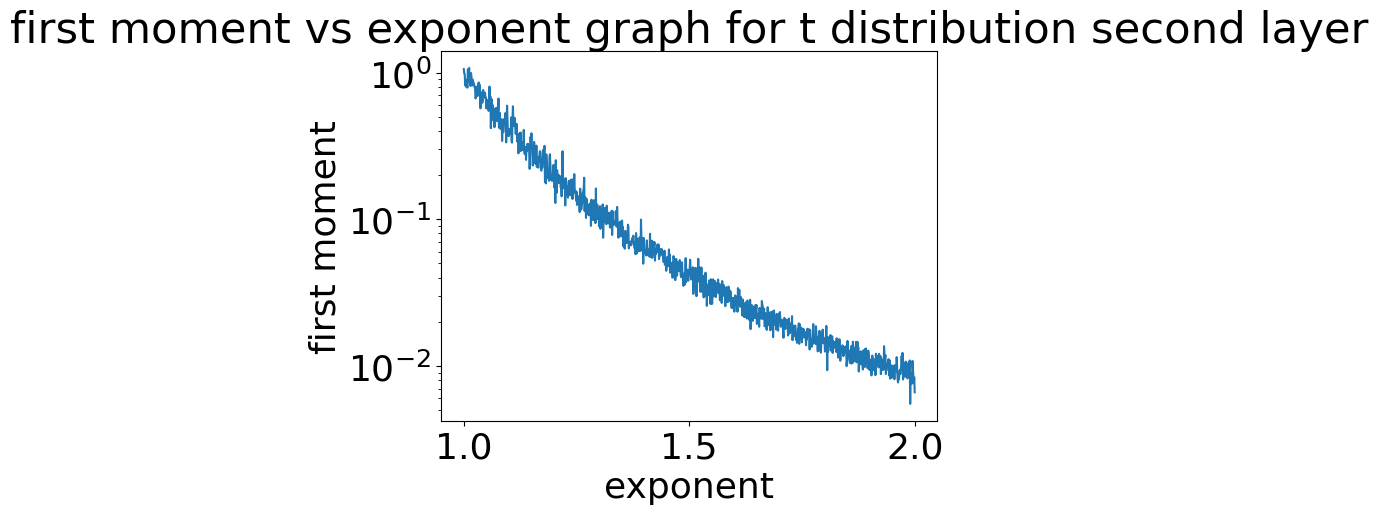

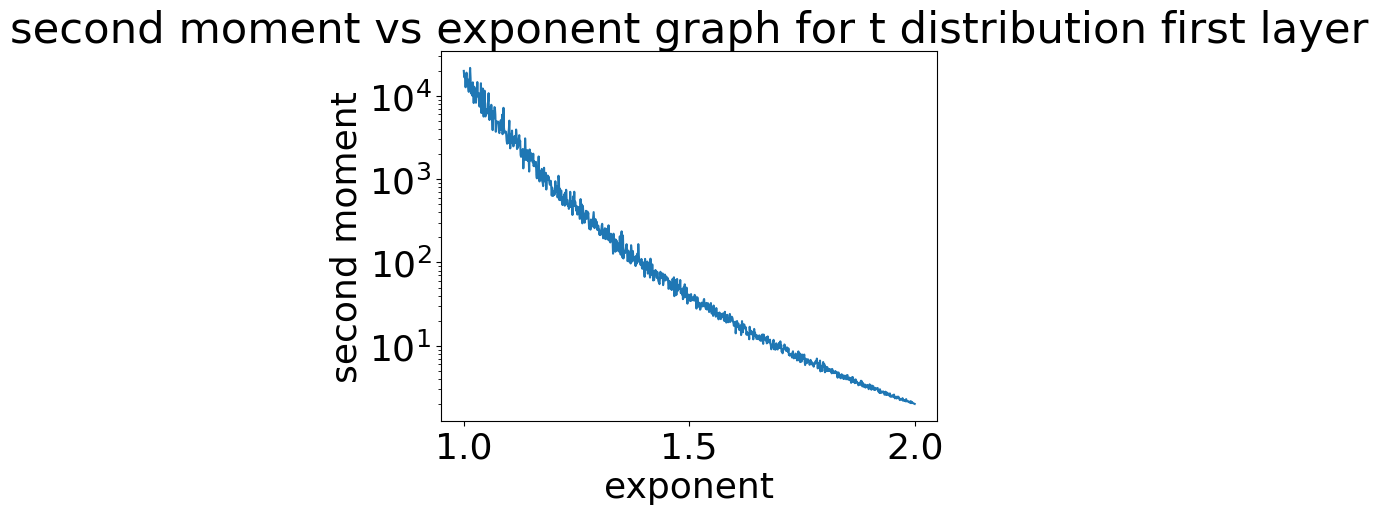

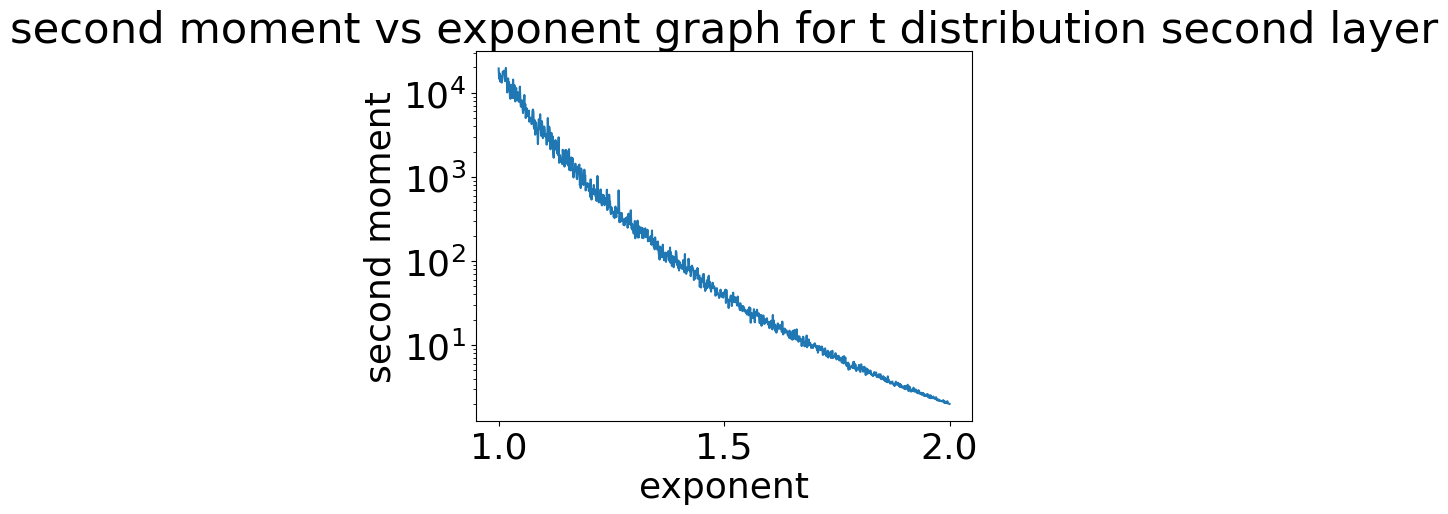

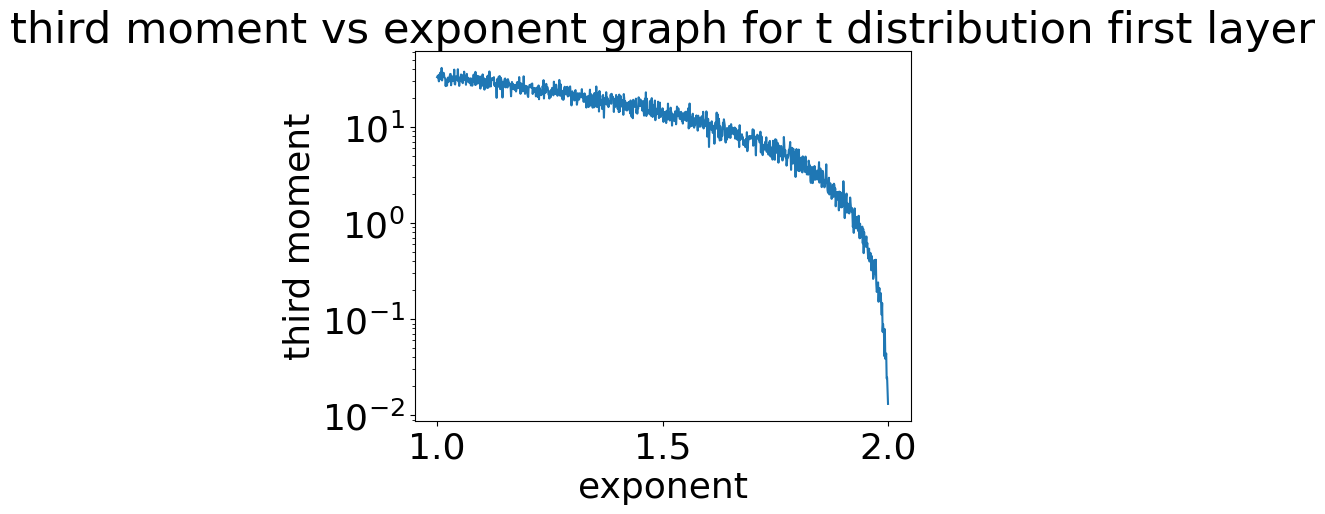

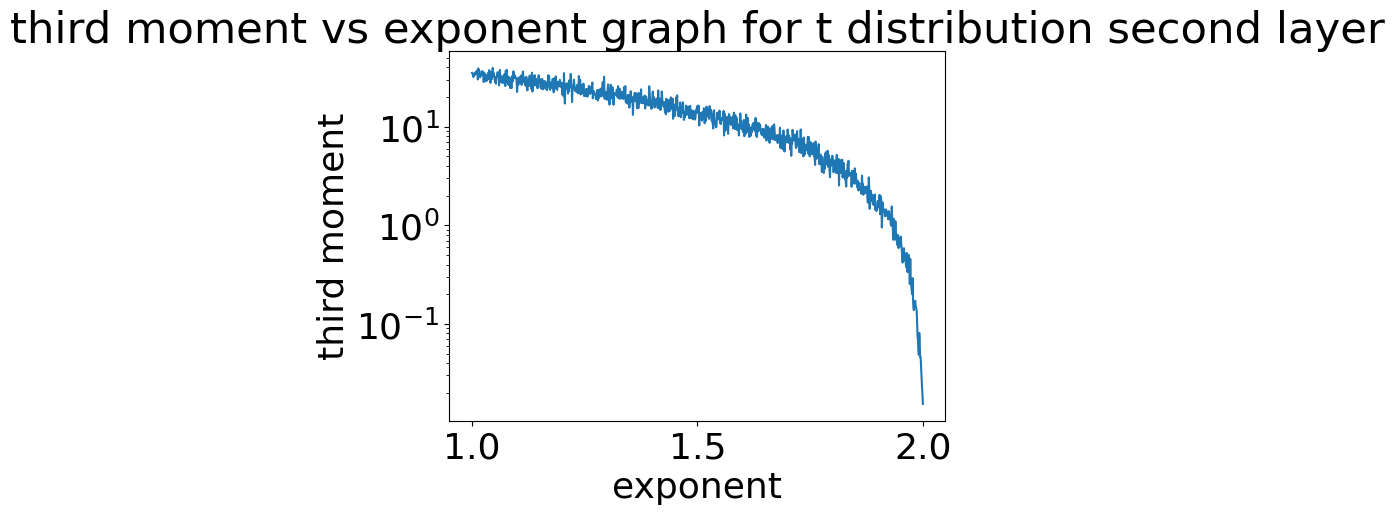

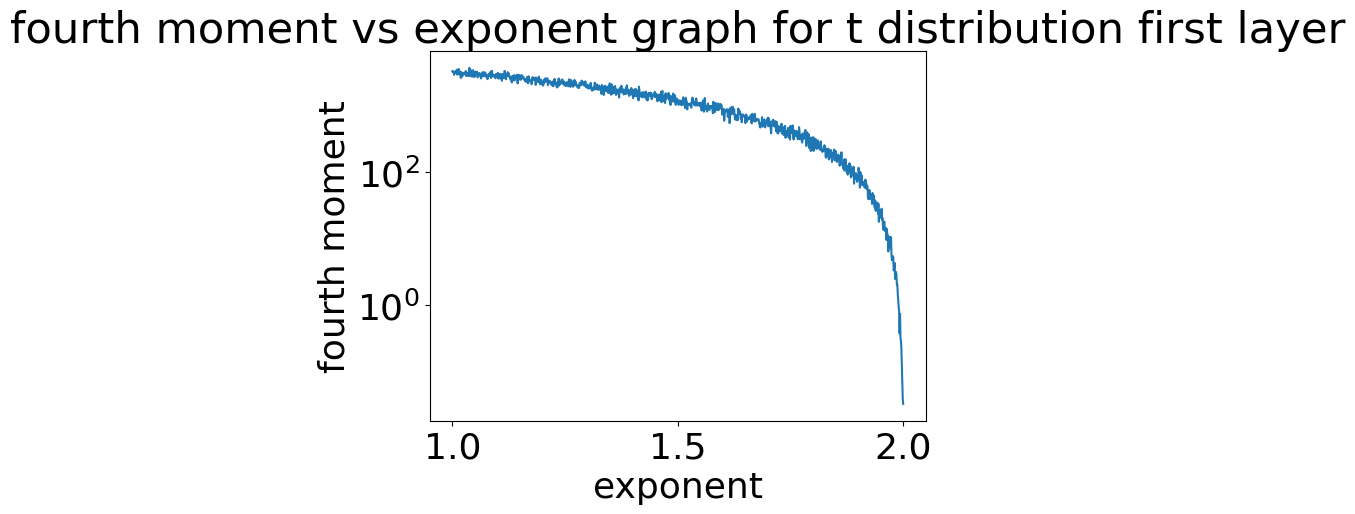

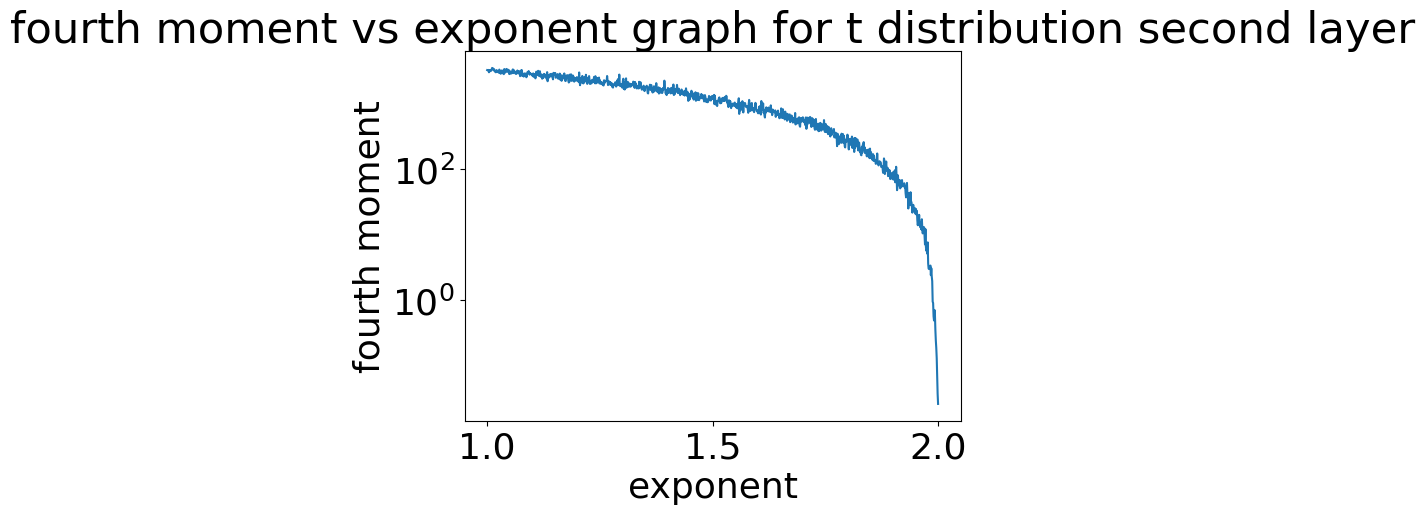

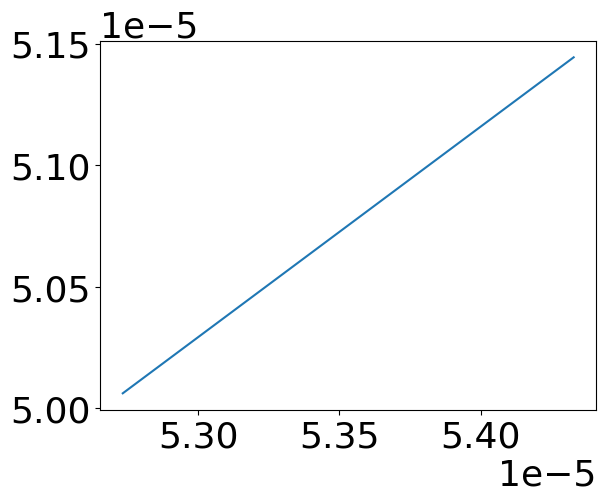

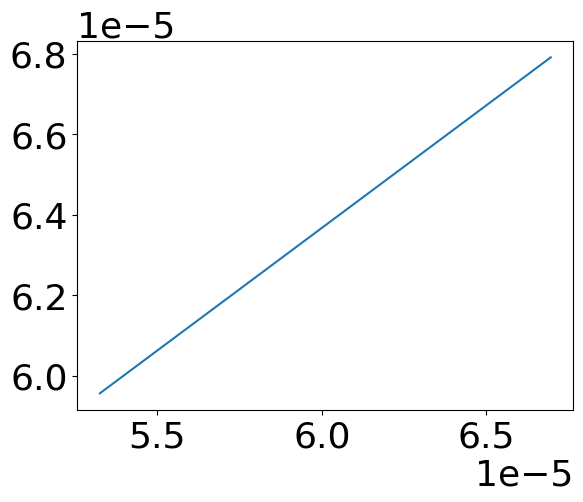

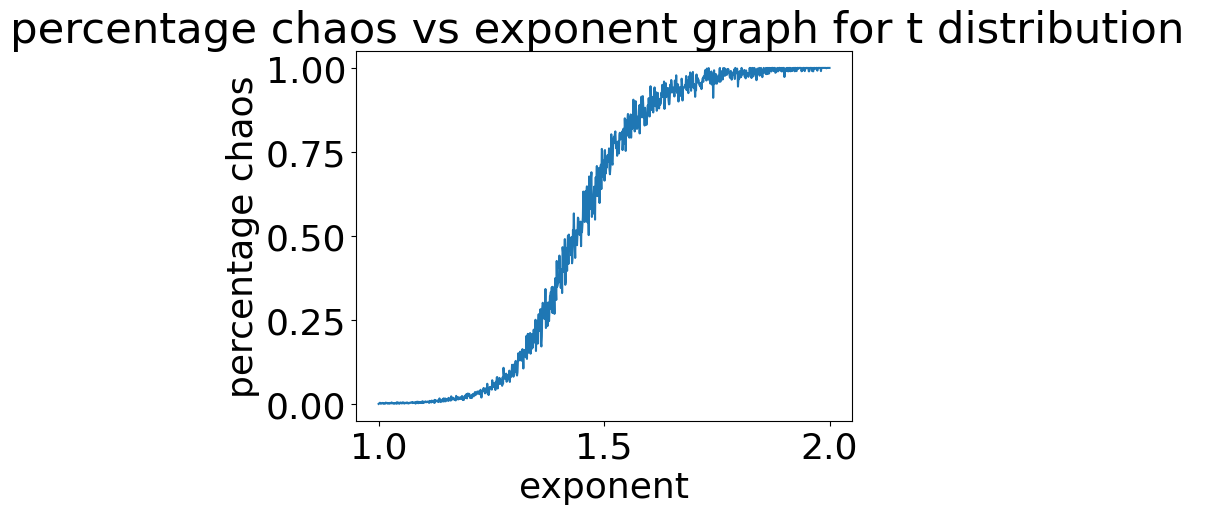

100100
1001
here


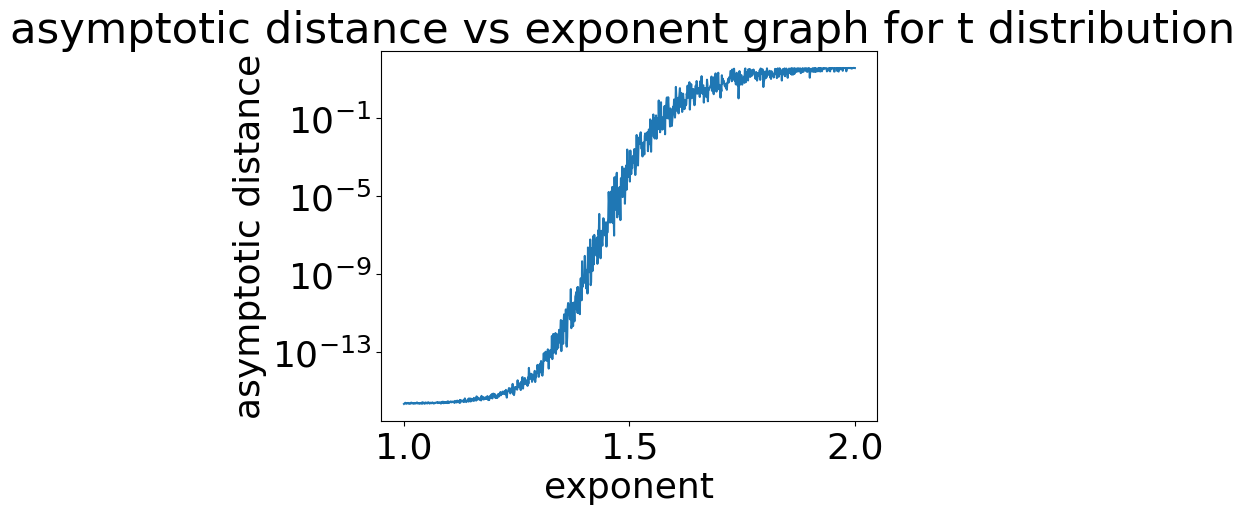

In [26]:
mu_value=np.linspace(1,2,epochs+1)

    
moment_treatment(mu_value,first_moment,"first")
moment_treatment(mu_value,second_moment,"second")
moment_treatment(mu_value,third_moment,"third")
moment_treatment(mu_value,fourth_moment,"fourth")
first_moment_1=processing(first_moment)
second_moment_1=processing(second_moment)
result=[]
vertical=[]
for i in range(len(first_moment_1)):
    #print(first_moment_1[i]/second_moment_1[i])
    result.append(first_moment_1[i]/second_moment_1[i])
    vertical.append(1/second_moment_1[i])
plt.plot(result[0],vertical[0])
plt.show()
plt.plot(result[1],vertical[1])
#print(result)
plt.show()
chaos_treatment(mu_value,average_chaos,"percentage chaos")
print(np.asarray(asymptotic_dist).size)
chaos_treatment(mu_value,asymptotic_dist,"asymptotic distance")
